### **Importing Essential Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### **Reading CSV Files**

In [2]:
df = pd.read_csv('../Data/cleaned_data.csv')
df.head()

,App,Category,Rating,Reviews,Size_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,365Scores - Live Scores,SPORTS,4.6,666521,25600.0,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
1,8 Ball Pool,GAME,4.5,14201891,53248.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
2,95Live -SG#1 Live Streaming App,DATING,4.1,4954,15360.0,1000000,Free,0.0,Teen,Dating,2018-08-01,8.7.2,4.2 and up
3,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,29708,19456.0,1000000,Free,0.0,Teen,Entertainment,2018-07-16,3.1.4,4.4 and up
4,AC - Tips & News for Android™,NEWS_AND_MAGAZINES,4.2,23292,14336.0,1000000,Free,0.0,Everyone 10+,News & Magazines,2018-05-24,3.1.12,4.1 and up


### **Descriptive statistics**

In [3]:
df.describe()

,Rating,Reviews,Size_KB,Installs,Price
count,6952.000000,6.952000e+03,6952.000000,6.952000e+03,6952.000000
mean,4.159537,1.440510e+05,22234.933990,4.347792e+06,1.179125
std,0.560536,1.027583e+06,23258.157083,2.652864e+07,18.293827
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,8.300000e+01,5017.600000,1.000000e+04,0.000000
50%,4.300000,1.503000e+03,13312.000000,1.000000e+05,0.000000
75%,4.500000,2.604500e+04,31744.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,102400.000000,1.000000e+09,400.000000


In [4]:
df.describe(include = 'O')

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,6952,6952,6952,6952,6952,6952,6952,6952
unique,6952,33,2,5,111,1272,2505,30
top,365Scores - Live Scores,FAMILY,Free,Everyone,Tools,2018-08-03,1.0,4.1 and up
freq,1,1529,6420,5632,623,167,447,1715


In [5]:
unique_categories = df['Category'].unique()
print("Unique Categories:", unique_categories)

Unique Categories: ['SPORTS' 'GAME' 'DATING' 'FAMILY' 'NEWS_AND_MAGAZINES' 'SHOPPING'
 'SOCIAL' 'FINANCE' 'PERSONALIZATION' 'PHOTOGRAPHY' 'MEDICAL'
 'TRAVEL_AND_LOCAL' 'EDUCATION' 'COMMUNICATION' 'TOOLS' 'BUSINESS'
 'LIBRARIES_AND_DEMO' 'FOOD_AND_DRINK' 'COMICS' 'LIFESTYLE' 'PRODUCTIVITY'
 'BOOKS_AND_REFERENCE' 'ENTERTAINMENT' 'HEALTH_AND_FITNESS'
 'MAPS_AND_NAVIGATION' 'VIDEO_PLAYERS' 'ART_AND_DESIGN'
 'AUTO_AND_VEHICLES' 'BEAUTY' 'EVENTS' 'HOUSE_AND_HOME' 'PARENTING'
 'WEATHER']


### 1. Category

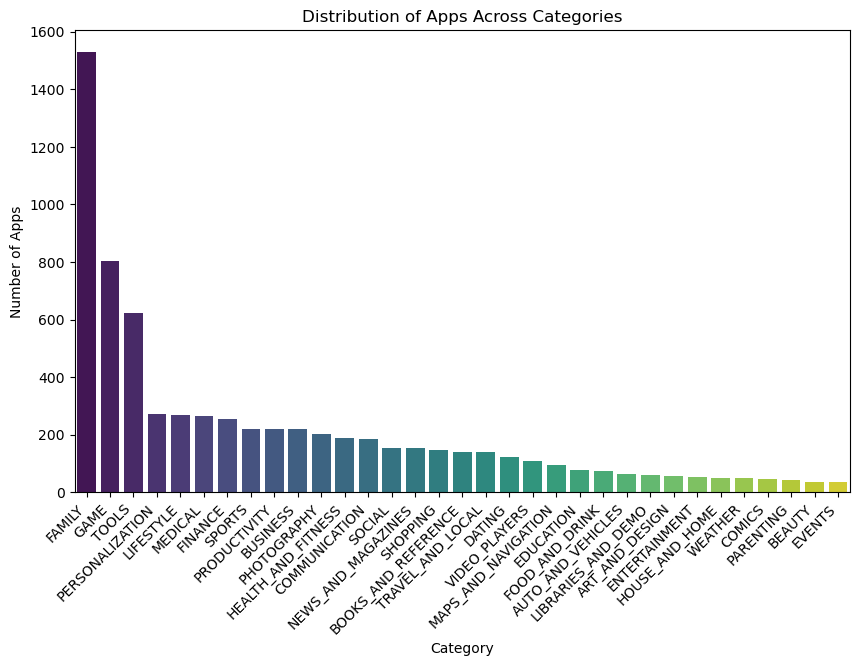

In [6]:
category_counts = df['Category'].value_counts().reset_index()

#Visualize the distribution of apps across categories
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Category', y = 'count', data =category_counts , palette = 'viridis')
plt.title('Distribution of Apps Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')

plt.show()

In [7]:
#Analyze trends or patterns within each category
category_stats = df.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum', 'Installs': 'sum','Price':'sum'})
print("\nStatistics by Category:")
category_stats


Statistics by Category:


,Rating,Reviews,Installs,Price
Category,,,,
ART_AND_DESIGN,4.381818,862464,48228100,5.97
AUTO_AND_VEHICLES,4.146774,720366,33769800,0.00
BEAUTY,4.291892,185749,13416200,0.00
BOOKS_AND_REFERENCE,4.322695,3263086,114784155,20.89
BUSINESS,4.095475,3632229,286282920,51.42
COMICS,4.193478,584845,16431100,0.00
COMMUNICATION,4.074194,45808376,1815915530,41.73
DATING,3.963934,2197211,84592410,14.98
EDUCATION,4.371795,3262600,108702000,13.97


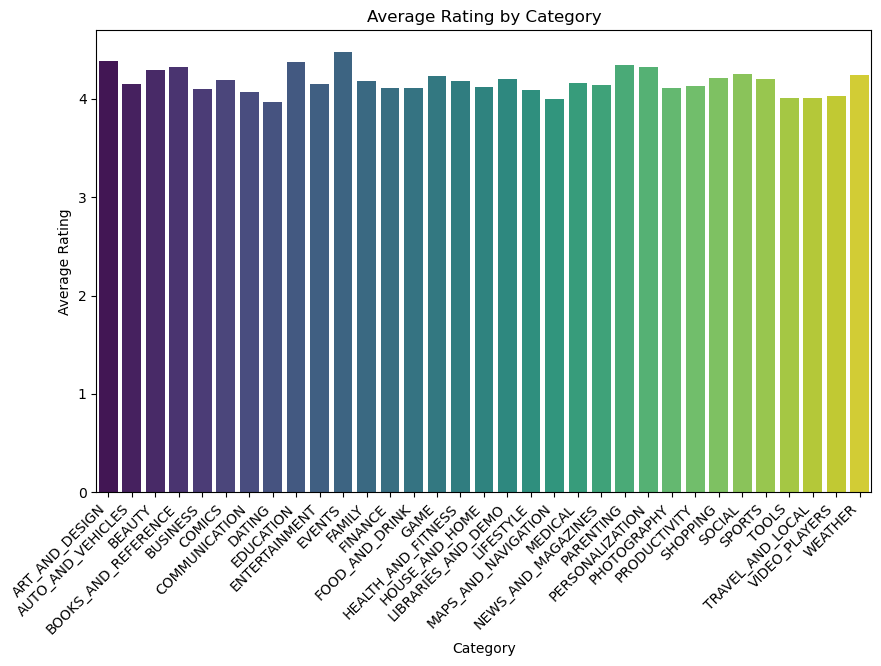

In [8]:
# Average rating for each category
plt.figure(figsize=(10, 6))
sns.barplot(x = category_stats.index ,y = 'Rating', data = category_stats, palette = 'viridis')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

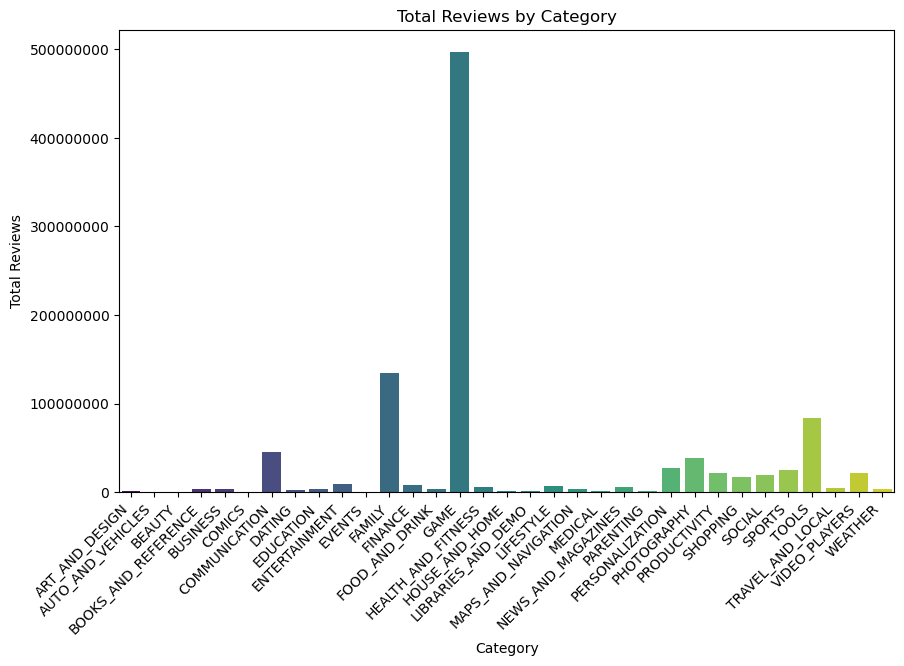

In [9]:
# Total reviews for each category
plt.figure(figsize=(10, 6))
sns.barplot(x = category_stats.index ,y = 'Reviews', data = category_stats, palette = 'viridis')
plt.title('Total Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45, ha='right')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

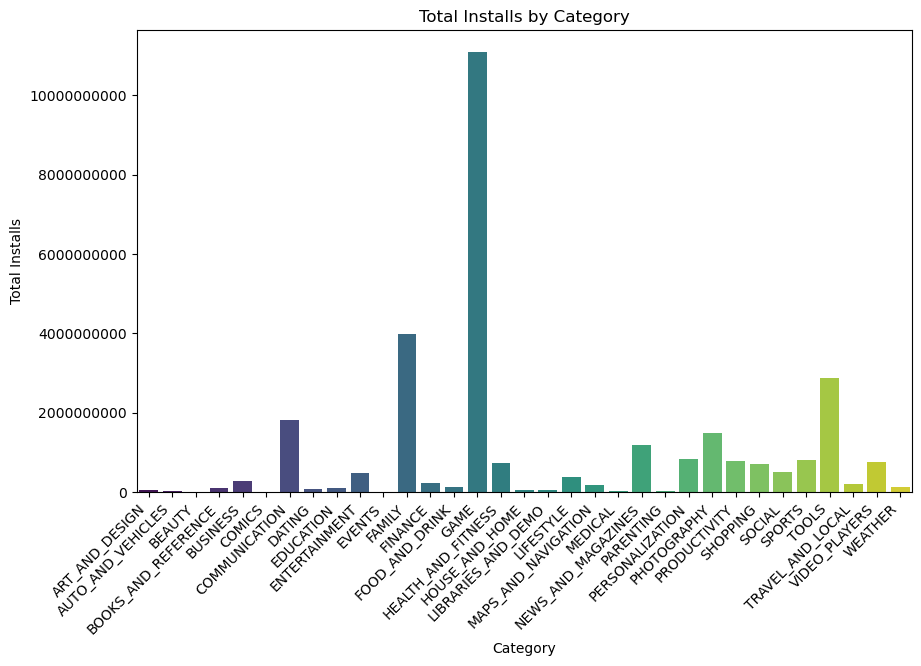

In [10]:
#Total installs for each category
plt.figure(figsize=(10, 6))
sns.barplot(x = category_stats.index ,y = 'Installs', data = category_stats, palette = 'viridis')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

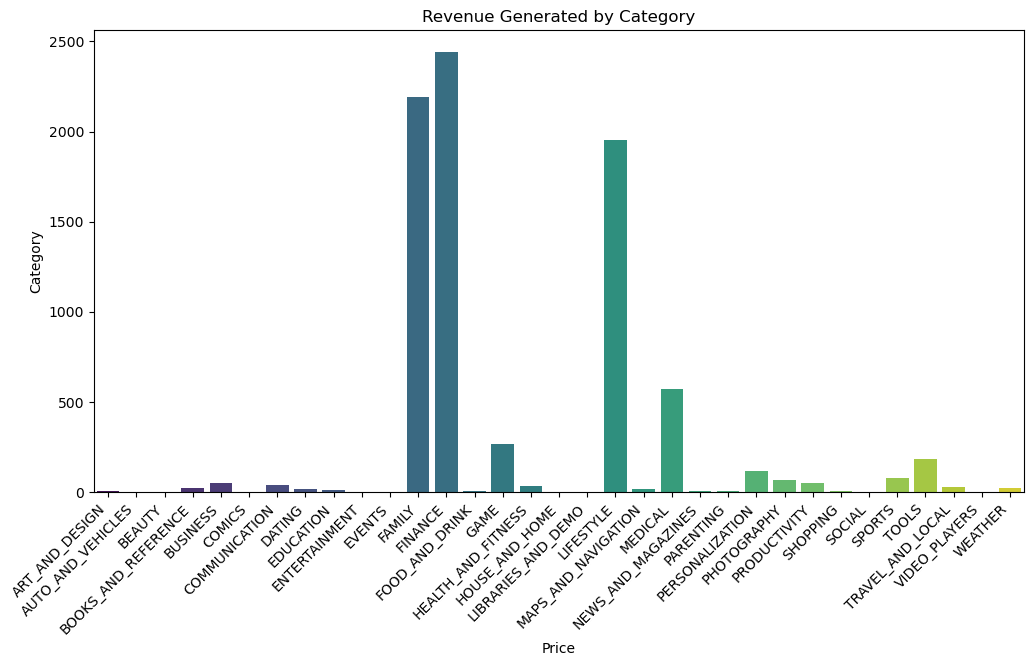

In [11]:
#Revenue Generated by Category
plt.figure(figsize=(12, 6))
sns.barplot(x = category_stats.index ,y = 'Price', data = category_stats, palette = 'viridis')
plt.title('Revenue Generated by Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right')

plt.show()

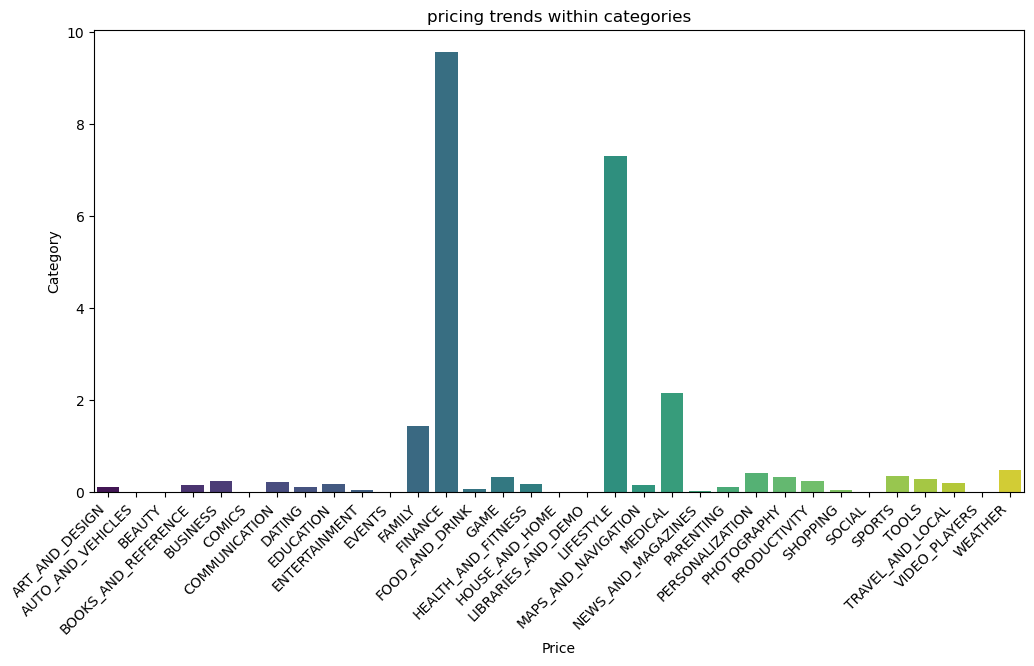

In [12]:
avg_price_category = df.groupby('Category')['Price'].mean().reset_index()

# Price Distribution by Category
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Category', y = 'Price', data = avg_price_category, palette = 'viridis')
plt.title('pricing trends within categories')
plt.xlabel('Price')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right')

plt.show()

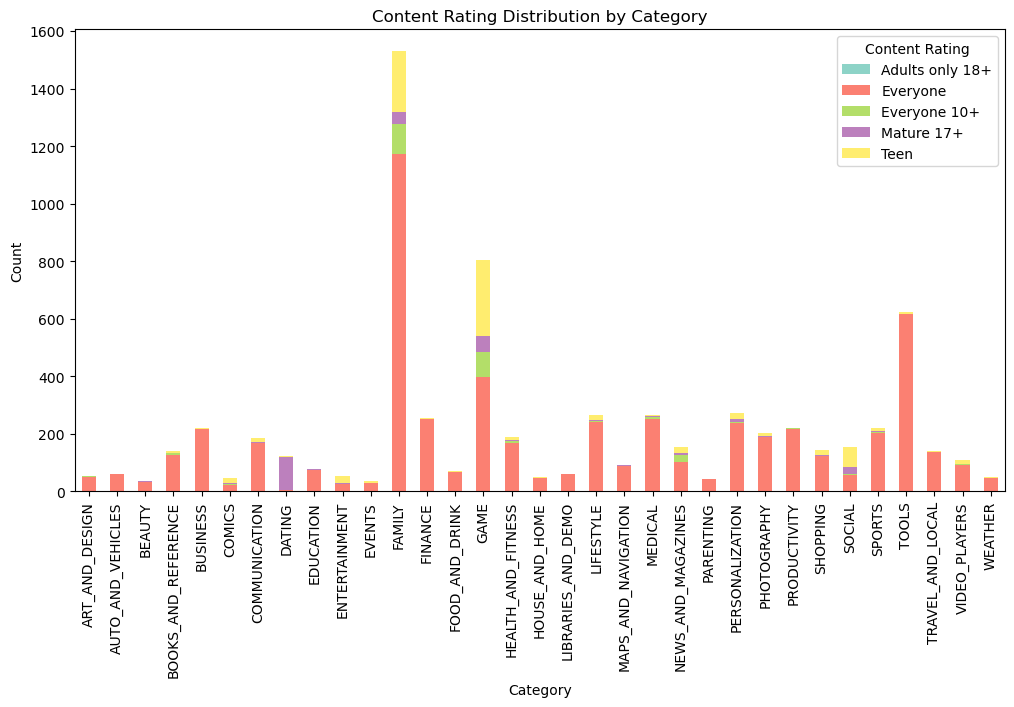

In [13]:
# Content Rating Distribution by Category
content_rating_by_category = df.groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)
content_rating_by_category.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Set3')
plt.title('Content Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Content Rating')

plt.show()

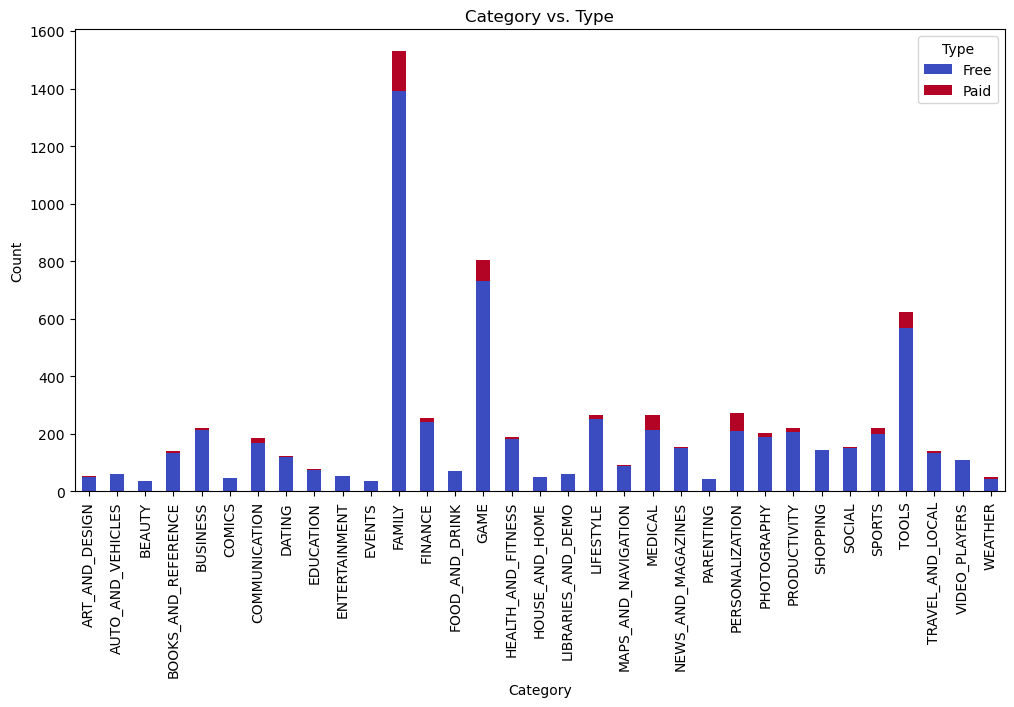

In [14]:
# Category vs. Type (Stacked Bar Chart)
category_type_counts = df.groupby(['Category', 'Type']).size().unstack(fill_value=0)
category_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
plt.title('Category vs. Type')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.legend(title='Type')

plt.show()

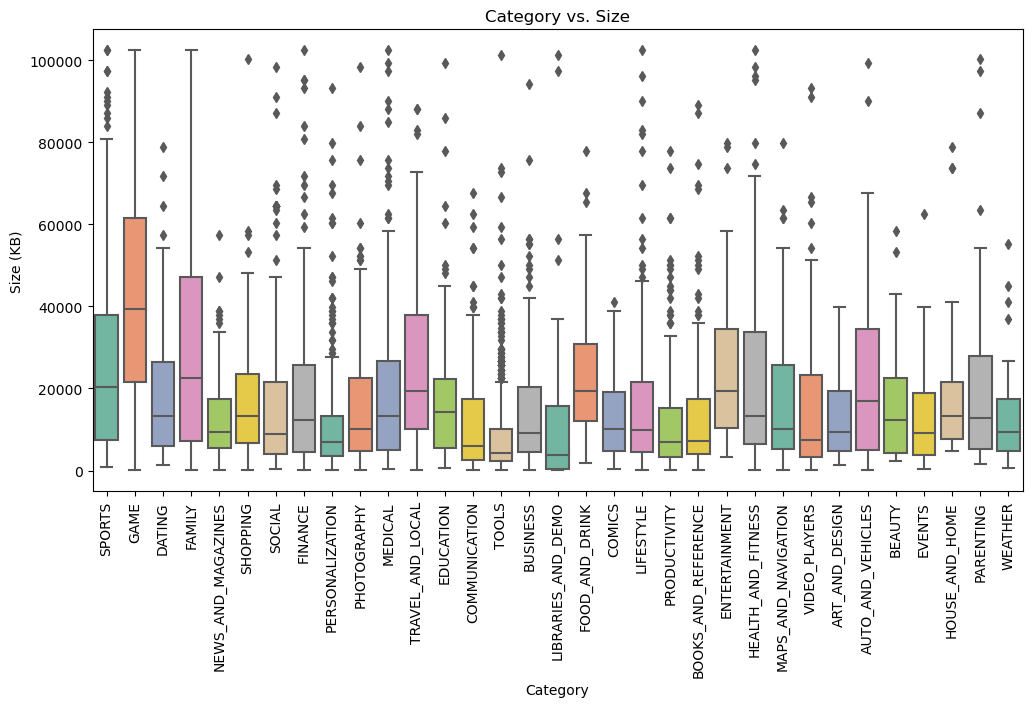

In [15]:
#Category vs Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size_KB', data=df, palette='Set2')
plt.title('Category vs. Size')
plt.xlabel('Category')
plt.ylabel('Size (KB)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

### 2. Rating

In [16]:
# Calculate summary statistics
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
mode_rating = df['Rating'].mode()[0]  # In case of multiple modes, choose the first one
std_dev_rating = df['Rating'].std()
min_rating = df['Rating'].min()
max_rating = df['Rating'].max()

# Print summary statistics
print("Summary Statistics for Ratings:")
print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Minimum: {min_rating}")
print(f"Maximum: {max_rating}")

Summary Statistics for Ratings:
Mean: 4.16
Median: 4.3
Mode: 4.4
Standard Deviation: 0.56
Minimum: 1.0
Maximum: 5.0


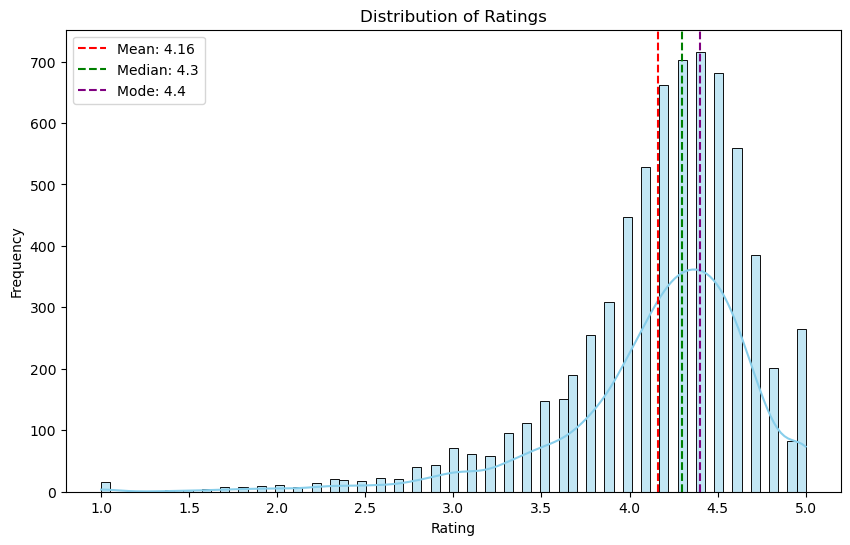

In [17]:
# Plot histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='--', label=f'Median: {median_rating}')
plt.axvline(mode_rating, color='purple', linestyle='--', label=f'Mode: {mode_rating}')
plt.legend()
plt.show()

In [18]:
# Check for outliers
q1 = df['Rating'].quantile(0.25)
q3 = df['Rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]
print("Outliers:")
outliers

Outliers:


,App,Category,Rating,Reviews,Size_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
72,Daily Manga - Comic & Webtoon,COMICS,3.2,1462,7270.4,100000,Free,0.0,Mature 17+,Comics,2018-05-18,1.0,4.0.3 and up
96,FarmersOnly Dating,DATING,3.0,1146,1433.6,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
136,Just She - Top Lesbian Dating,DATING,1.9,954,19456.0,100000,Free,0.0,Mature 17+,Dating,2018-07-18,6.3.7,5.0 and up
358,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1126.4,100000,Free,0.0,Everyone,Auto & Vehicles,2018-04-27,1.4,4.0.3 and up
433,Plugin:AOT v5.0,BUSINESS,3.1,4034,23.0,100000,Free,0.0,Everyone,Business,2015-09-11,3.0.1.11 (Build 311),2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,Florida Blue,HEALTH_AND_FITNESS,3.2,499,34816.0,100000,Free,0.0,Everyone,Health & Fitness,2018-07-10,4.2.1,7.0 and up
6846,SB · FN 1870 Mobile Banking,FINANCE,2.9,139,3379.2,10000,Free,0.0,Everyone,Finance,2017-06-19,3.0.5,4.0 and up
6852,Pint - FN Theme,PERSONALIZATION,2.5,6,234.0,100,Free,0.0,Everyone,Personalization,2013-08-10,1.0,2.2 and up
6900,Fisher-Price® Smart Connect™,TOOLS,2.7,422,73728.0,50000,Free,0.0,Everyone,Tools,2018-02-23,2.4.1,4.4 and up


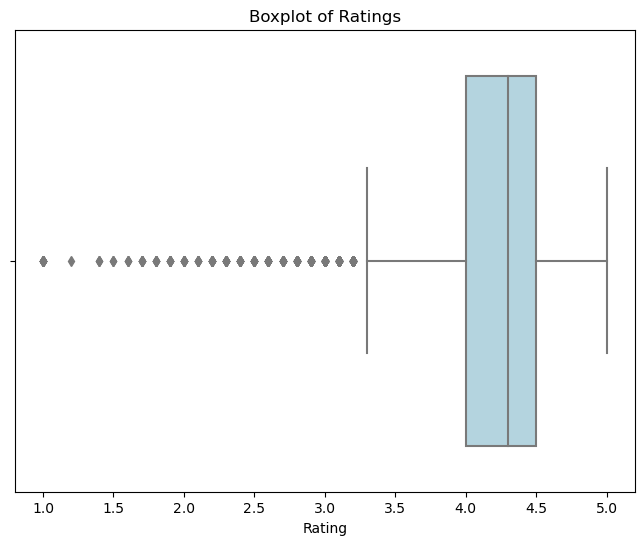

In [19]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'], color='lightblue')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

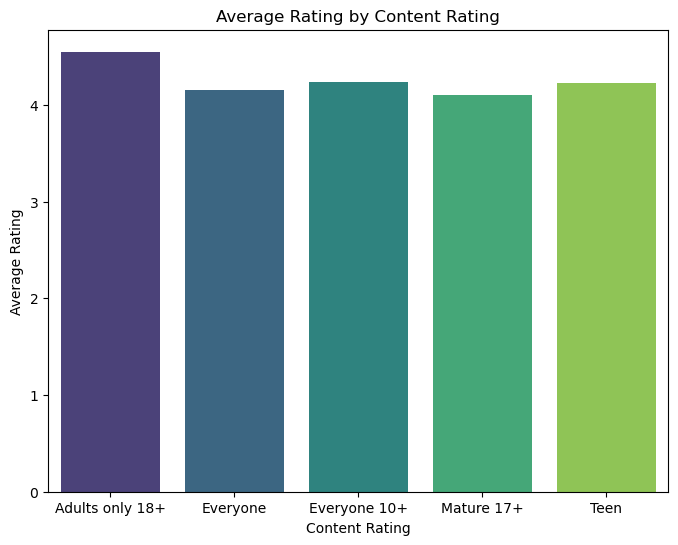

In [20]:
avg_rating_by_content = df.groupby('Content Rating')['Rating'].mean().reset_index()

# Plot bar plot of ratings across different content ratings
plt.figure(figsize=(8, 6))
sns.barplot(x='Content Rating', y='Rating', data=avg_rating_by_content, palette= 'viridis')
plt.title('Average Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')
plt.show()

In [21]:
rating_by_type = df.groupby('Type')['Rating'].mean().reset_index()
rating_by_type

,Type,Rating
0,Free,4.152523
1,Paid,4.244173


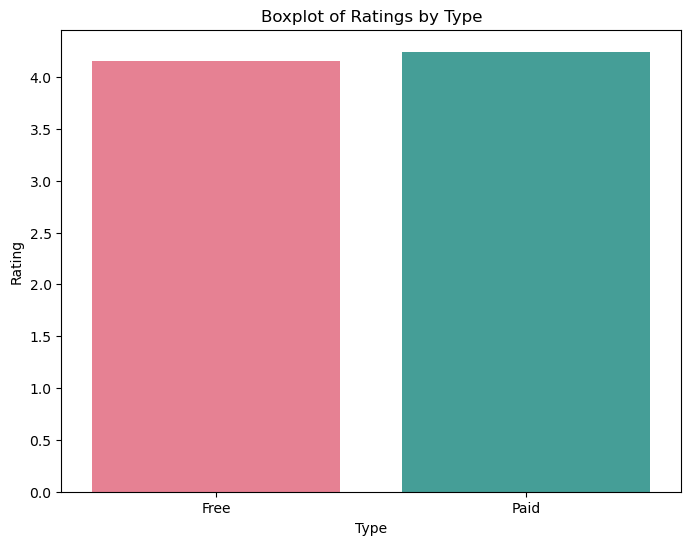

In [22]:
rating_by_type = df.groupby('Type')['Rating'].mean().reset_index()

# Box plot for Rating vs. Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Rating', data= rating_by_type, palette = 'husl')
plt.title('Boxplot of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

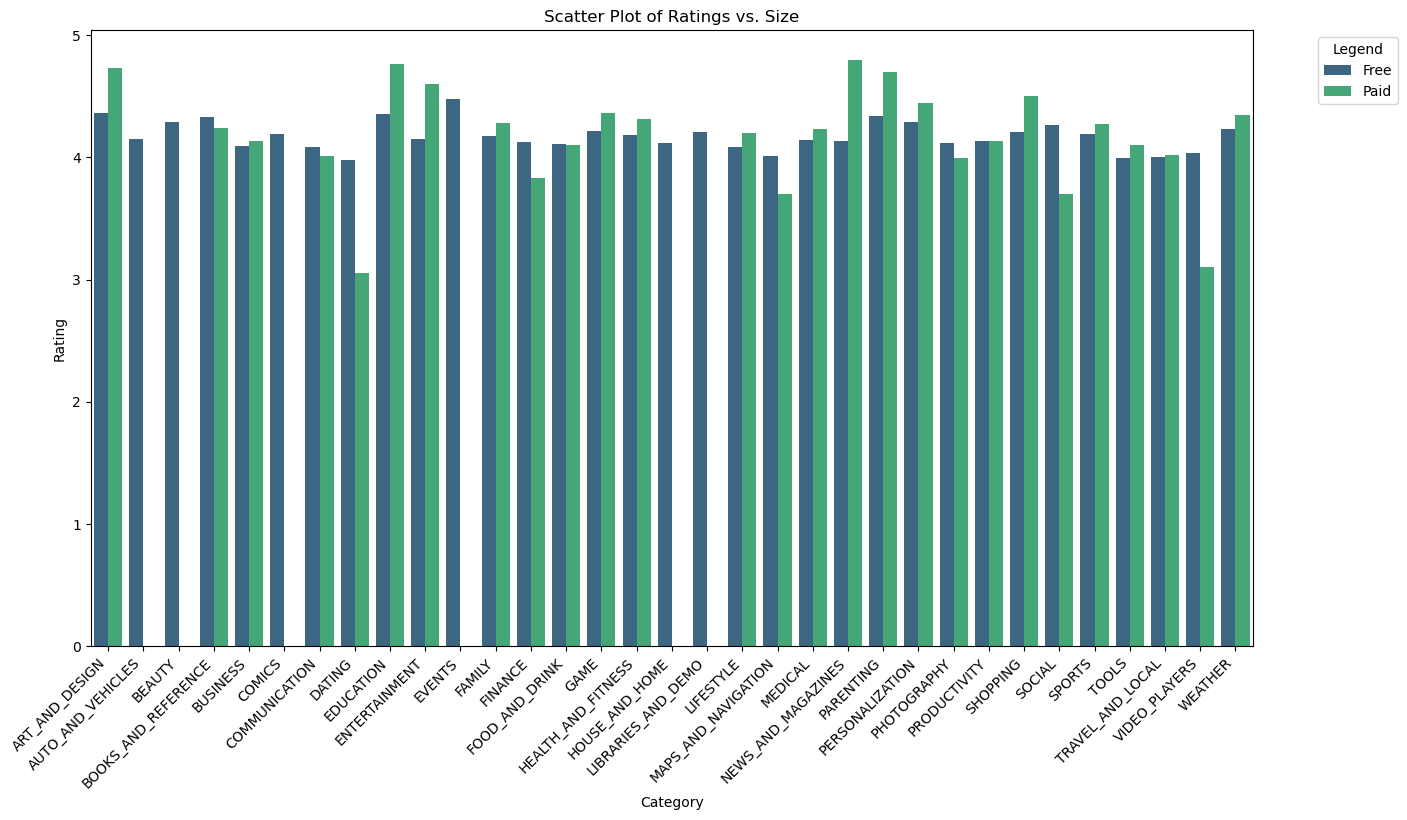

In [23]:
rating_by_category_and_type  =df.groupby(['Category', 'Type'])['Rating'].mean().reset_index()

# plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='Rating', hue = 'Type', data= rating_by_category_and_type, palette = 'viridis')
plt.title('Scatter Plot of Ratings vs. Size')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### 3. Reviews

In [24]:
# Summary Statistics
reviews_summary = df['Reviews'].describe()
print("Summary Statistics of Reviews:")
reviews_summary

Summary Statistics of Reviews:


count    6.952000e+03
mean     1.440510e+05
std      1.027583e+06
min      1.000000e+00
25%      8.300000e+01
50%      1.503000e+03
75%      2.604500e+04
max      4.489389e+07
Name: Reviews, dtype: float64

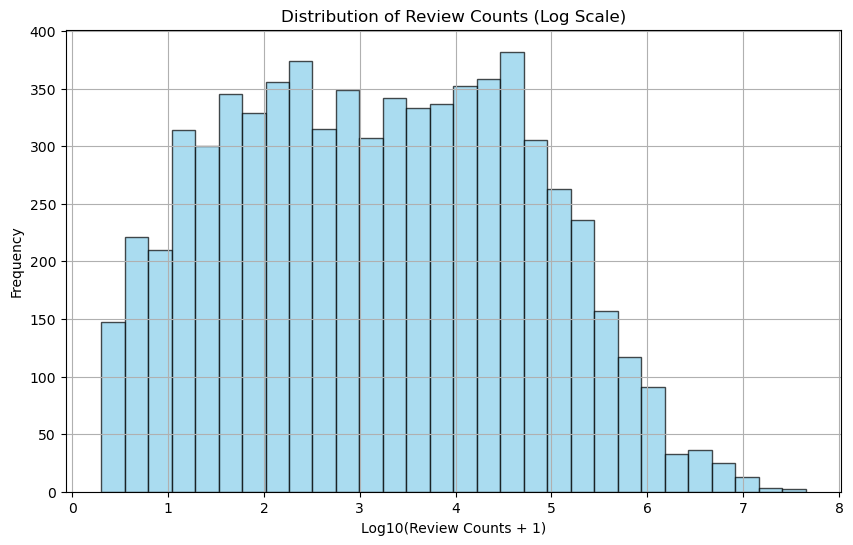

In [25]:
# Create a histogram with log scale
plt.figure(figsize=(10, 6))
plt.hist(np.log10(df['Reviews'] + 1), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Counts (Log Scale)')
plt.xlabel('Log10(Review Counts + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

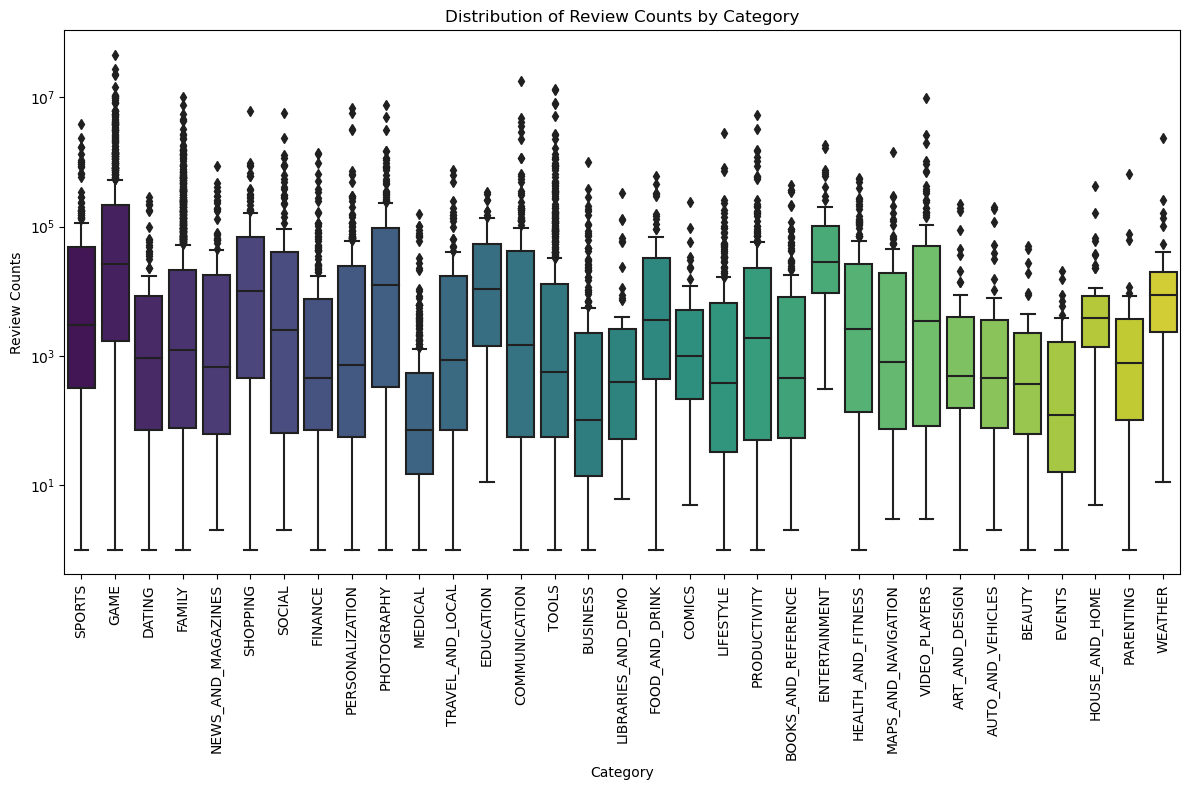

In [26]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a box plot for review counts within each category
sns.boxplot(data=df, x='Category', y='Reviews', palette='viridis')
plt.title('Distribution of Review Counts by Category')
plt.xlabel('Category')
plt.ylabel('Review Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Set the y-axis scale to logarithmic for better visualization
plt.tight_layout()

plt.show()

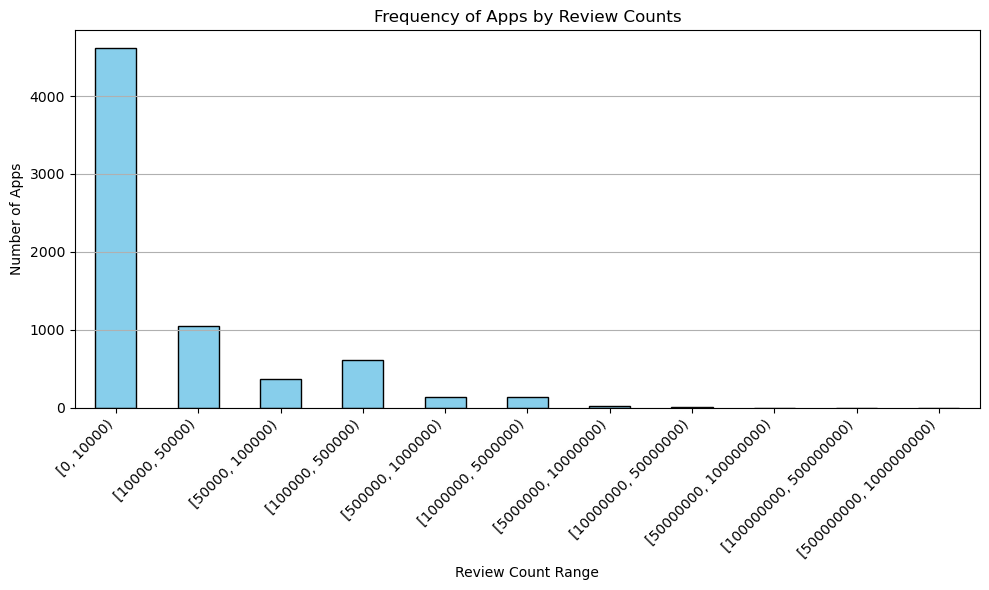

In [27]:
# Define the bins for different ranges of review counts
bins = [0, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 1000000000]

# Create a new column in the DataFrame to categorize apps based on review counts
df['Review Range'] = pd.cut(df['Reviews'], bins=bins, right=False)

# Count the number of apps in each review range category
review_counts = df['Review Range'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Apps by Review Counts')
plt.xlabel('Review Count Range')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

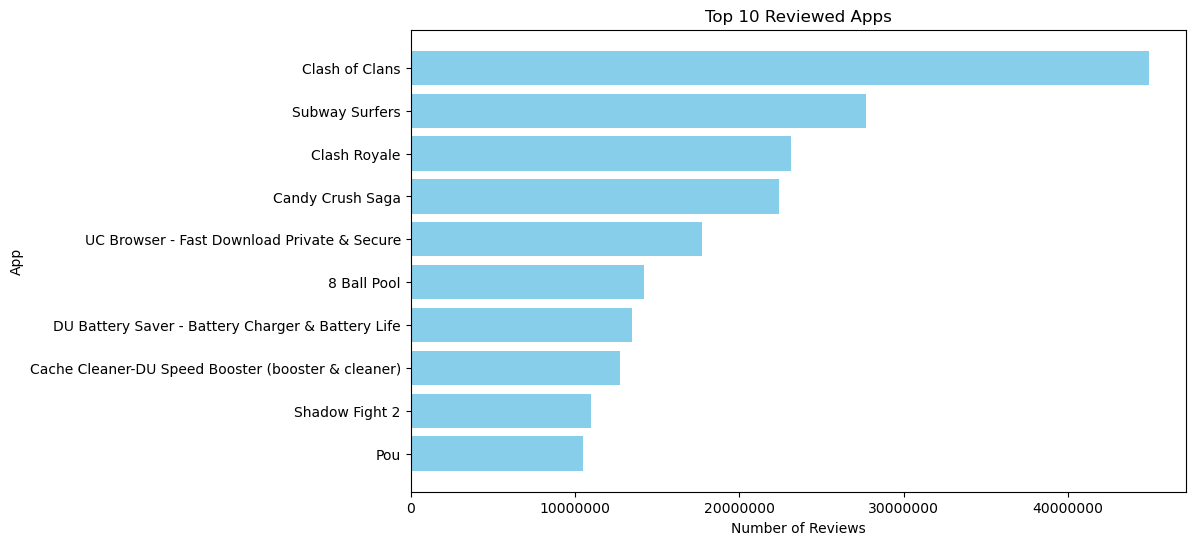

In [28]:
# Sort the DataFrame based on 'Reviews' column in descending order
top_reviewed_apps = df.sort_values(by='Reviews', ascending=False)

# Select the top 10 reviewed apps
top_10_reviewed_apps = top_reviewed_apps.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_reviewed_apps['App'], top_10_reviewed_apps['Reviews'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.title('Top 10 Reviewed Apps')
plt.gca().invert_yaxis()  # Invert y-axis to display the app with the highest reviews at the top

plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

plt.show()

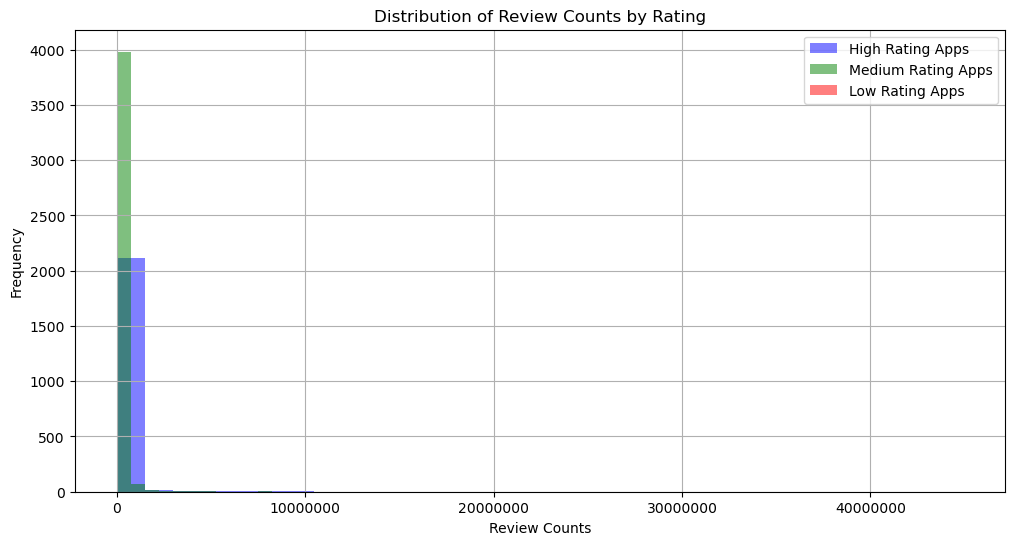

In [29]:
# Separate the dataset into groups based on ratings
high_rating_apps = df[df['Rating'] >= 4.5]
medium_rating_apps = df[(df['Rating'] >= 3.5) & (df['Rating'] < 4.5)]
low_rating_apps = df[df['Rating'] < 3.5]

# Create histograms to compare review counts distribution for different rating categories
plt.figure(figsize=(12, 6))

plt.hist(high_rating_apps['Reviews'], bins=30, alpha=0.5, label='High Rating Apps', color='blue')
plt.hist(medium_rating_apps['Reviews'], bins=30, alpha=0.5, label='Medium Rating Apps', color='green')
plt.hist(low_rating_apps['Reviews'], bins=30, alpha=0.5, label='Low Rating Apps', color='red')

plt.title('Distribution of Review Counts by Rating')
plt.xlabel('Review Counts')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

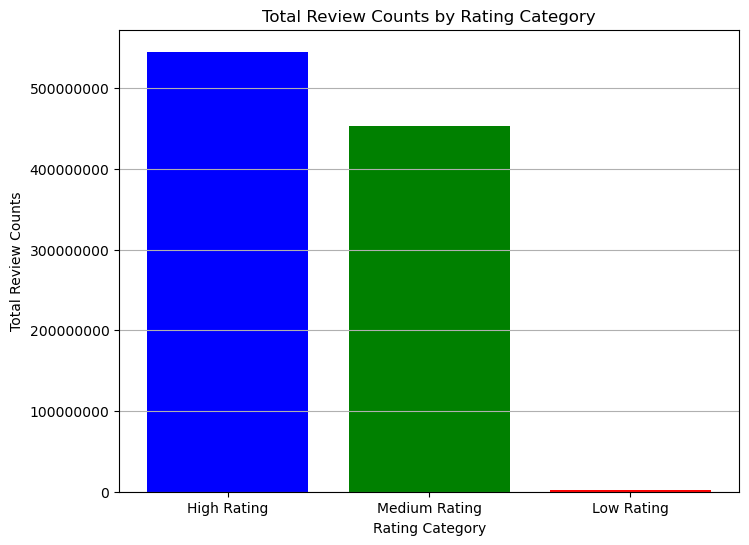

In [30]:
# Calculate the sum of reviews for each rating category
high_rating_reviews_sum = high_rating_apps['Reviews'].sum()
medium_rating_reviews_sum = medium_rating_apps['Reviews'].sum()
low_rating_reviews_sum = low_rating_apps['Reviews'].sum()

# Create a bar plot to visualize the sum of review counts for each rating category
plt.figure(figsize=(8, 6))

categories = ['High Rating', 'Medium Rating', 'Low Rating']
review_sums = [high_rating_reviews_sum, medium_rating_reviews_sum, low_rating_reviews_sum]

plt.bar(categories, review_sums, color=['blue', 'green', 'red'])
plt.title('Total Review Counts by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Total Review Counts')
plt.grid(axis='y')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

### 4. Size

In [31]:
# Step 1: Summary statistics
print("Summary statistics for Size_KB:")
print(df['Size_KB'].describe())

Summary statistics for Size_KB:
count      6952.000000
mean      22234.933990
std       23258.157083
min           8.500000
25%        5017.600000
50%       13312.000000
75%       31744.000000
max      102400.000000
Name: Size_KB, dtype: float64


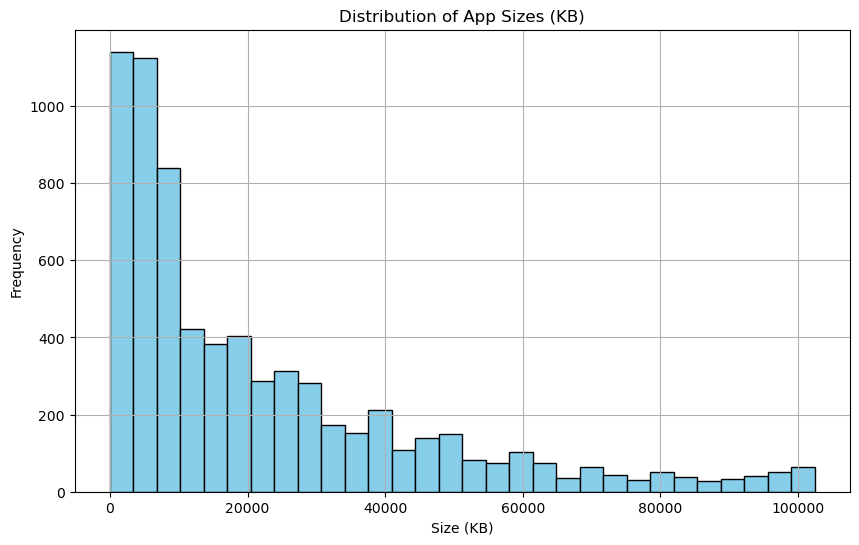

In [32]:
# Step 2: Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Size_KB'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of App Sizes (KB)')
plt.xlabel('Size (KB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

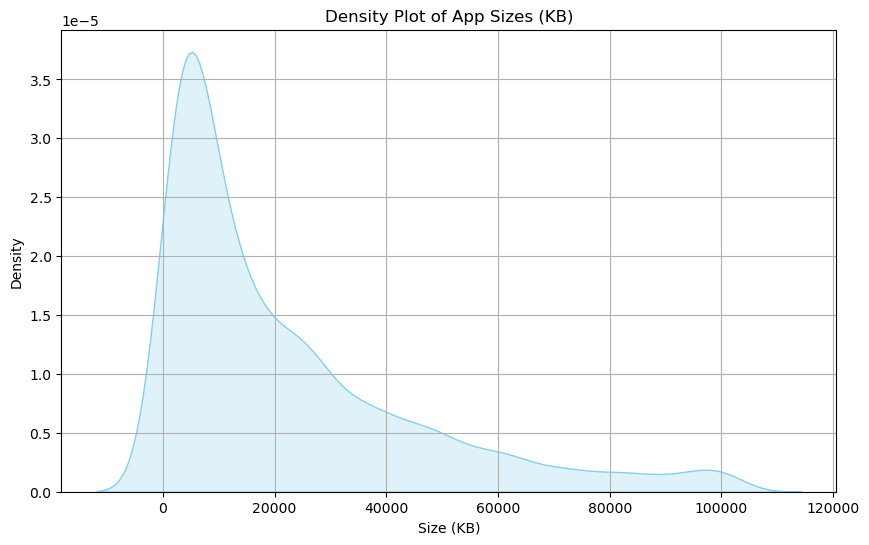

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Size_KB'], shade=True, color='skyblue')
plt.title('Density Plot of App Sizes (KB)')
plt.xlabel('Size (KB)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### 5. Installs

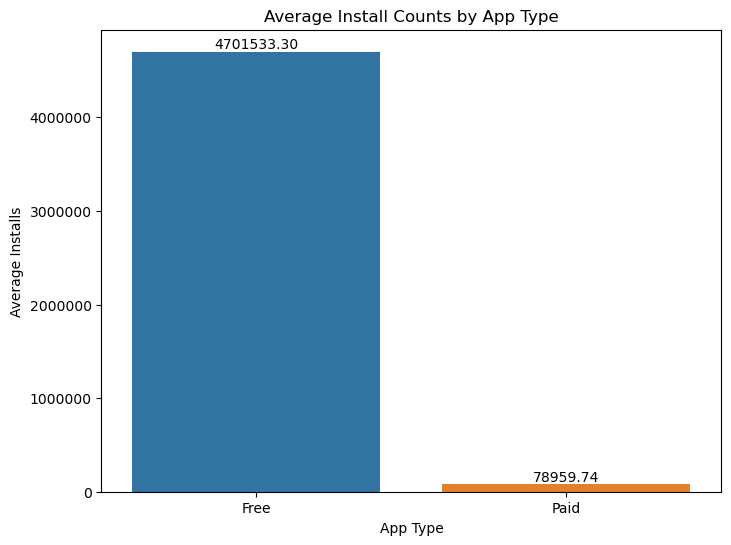

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Installs', data=df, estimator=np.mean, ci = None)  # Use median as the estimator
plt.xlabel('App Type')
plt.ylabel('Average Installs')
plt.title('Average Install Counts by App Type')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Annotate the bars with their values
for index, value in enumerate(df.groupby('Type')['Installs'].mean()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

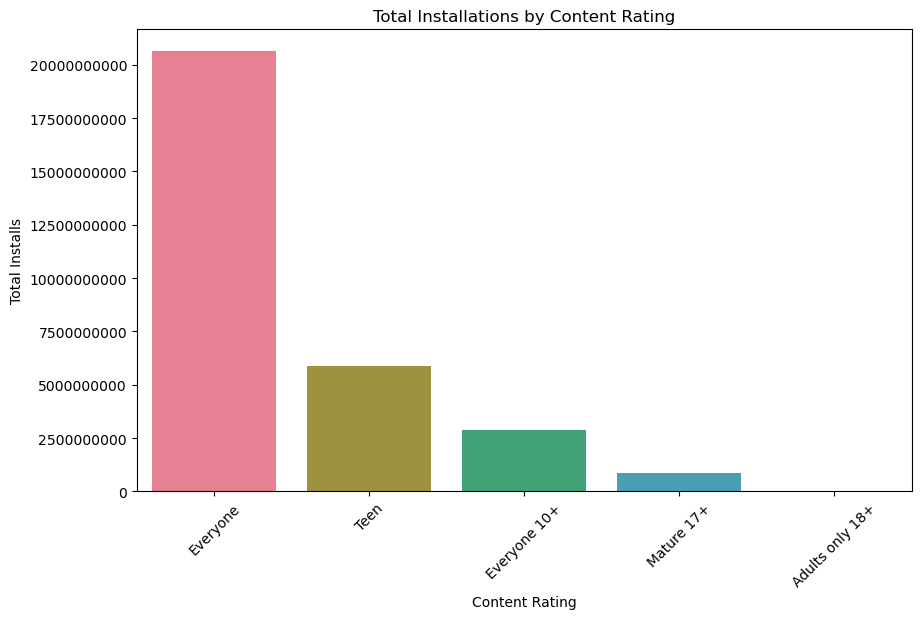

In [35]:
# Installations by Content Rating
content_rating_installs = df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)

# Plot Bar for the data
plt.figure(figsize=(10, 6))
sns.barplot(x= content_rating_installs.index, y = content_rating_installs.values, palette = 'husl')
plt.xlabel('Content Rating')
plt.ylabel('Total Installs')
plt.title('Total Installations by Content Rating')
plt.xticks(rotation=45)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

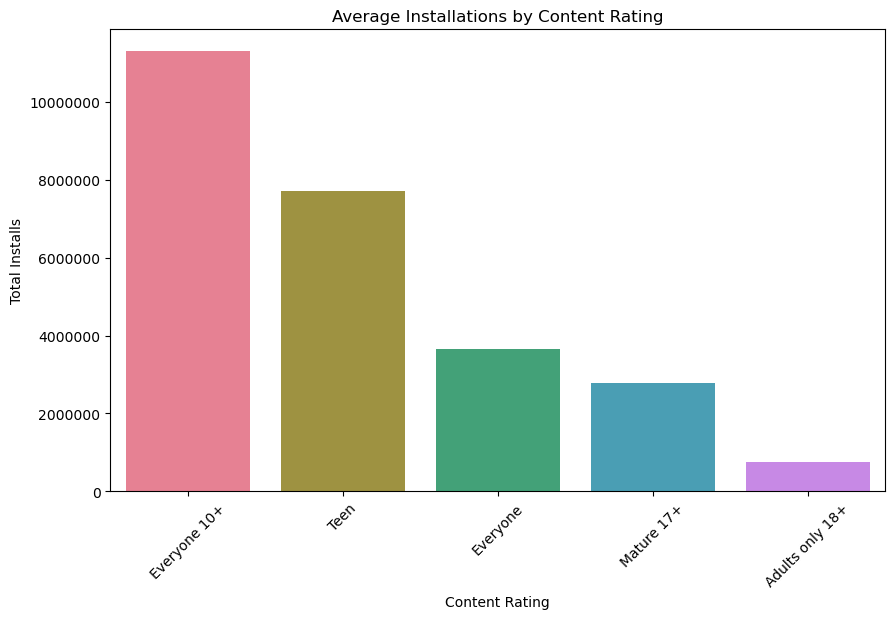

In [36]:
# Installations by Content Rating
content_rating_installs_avg = df.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)

# Plot Bar for the data
plt.figure(figsize=(10, 6))
sns.barplot(x= content_rating_installs_avg.index, y = content_rating_installs_avg.values, palette = 'husl')
plt.xlabel('Content Rating')
plt.ylabel('Total Installs')
plt.title('Average Installations by Content Rating')
plt.xticks(rotation=45)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

In [37]:
# Installations by Content Rating
genre_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False)
genre_installs

Genres
Arcade                         3283077677
Action                         2973537470
Tools                          2883503500
Casual                         2055478960
Communication                  1815915530
                                  ...    
Puzzle;Education                   100000
Adventure;Brain Games              100000
Comics;Creativity                   50000
Books & Reference;Education         11000
Board;Pretend Play                    100
Name: Installs, Length: 111, dtype: int64

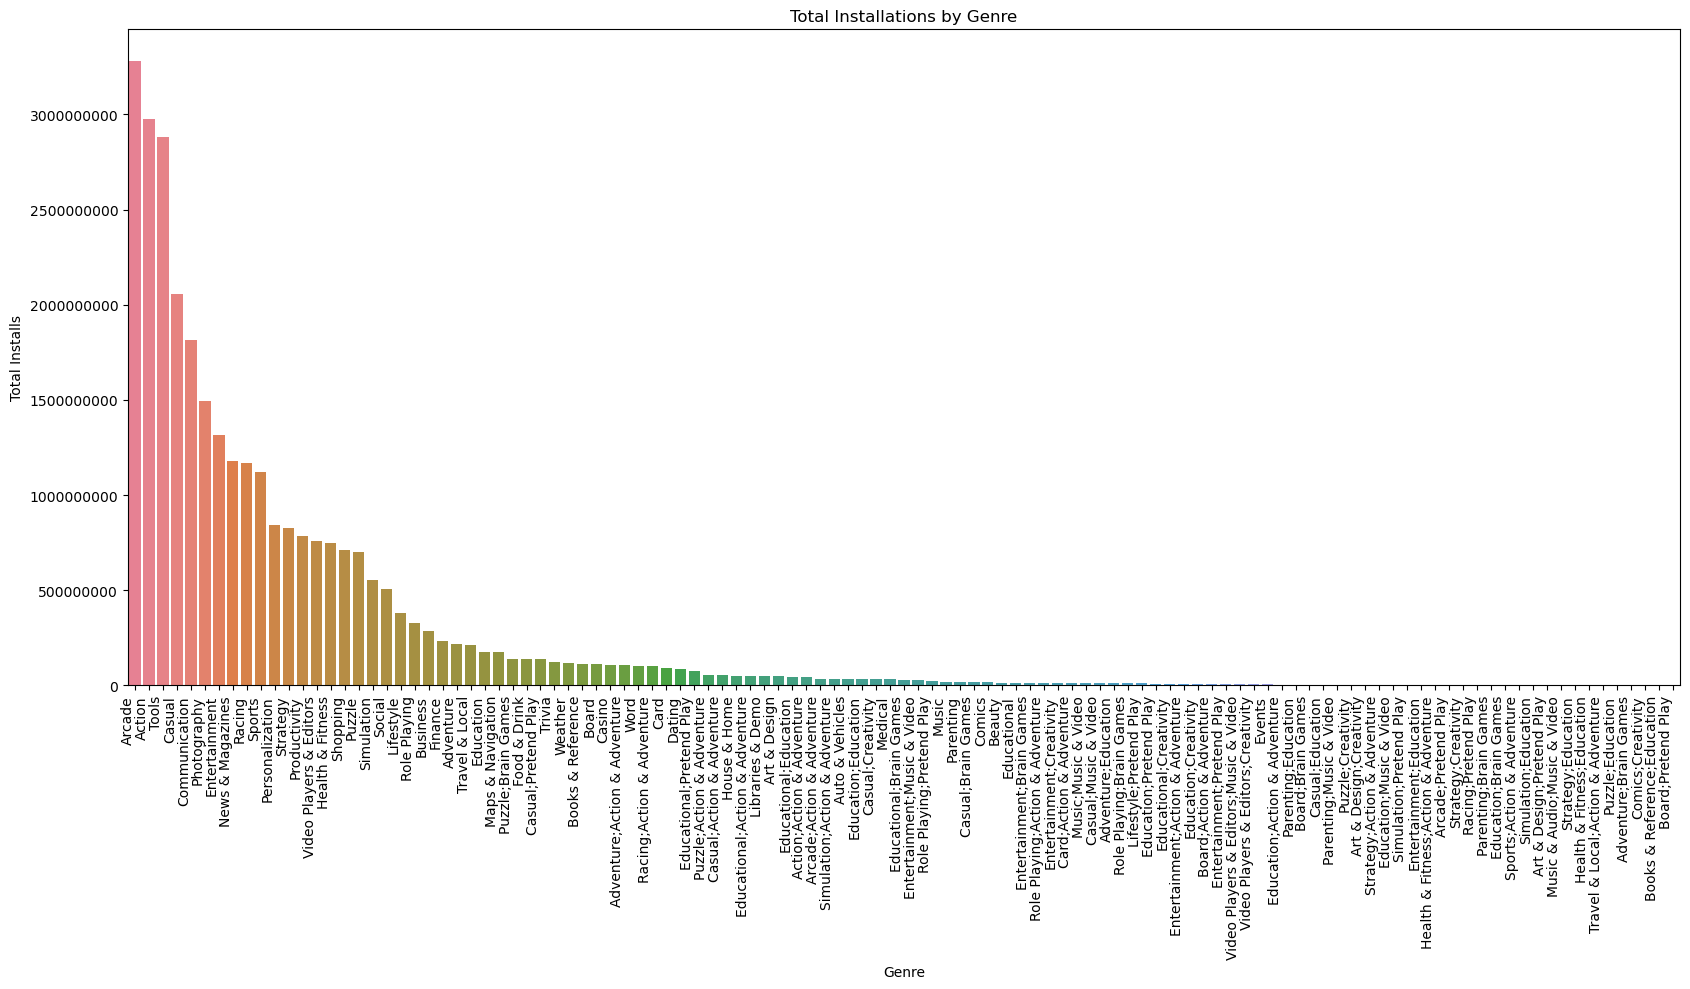

In [38]:
# Plot Bar for the genre_installs
plt.figure(figsize=(17, 10))
sns.barplot(x= genre_installs.index, y = genre_installs.values, palette = 'husl')
plt.xlabel('Genre')
plt.ylabel('Total Installs')
plt.title('Total Installations by Genre')
plt.xticks(rotation=90, ha='right')  # Rotate labels to 90 degrees and align right

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

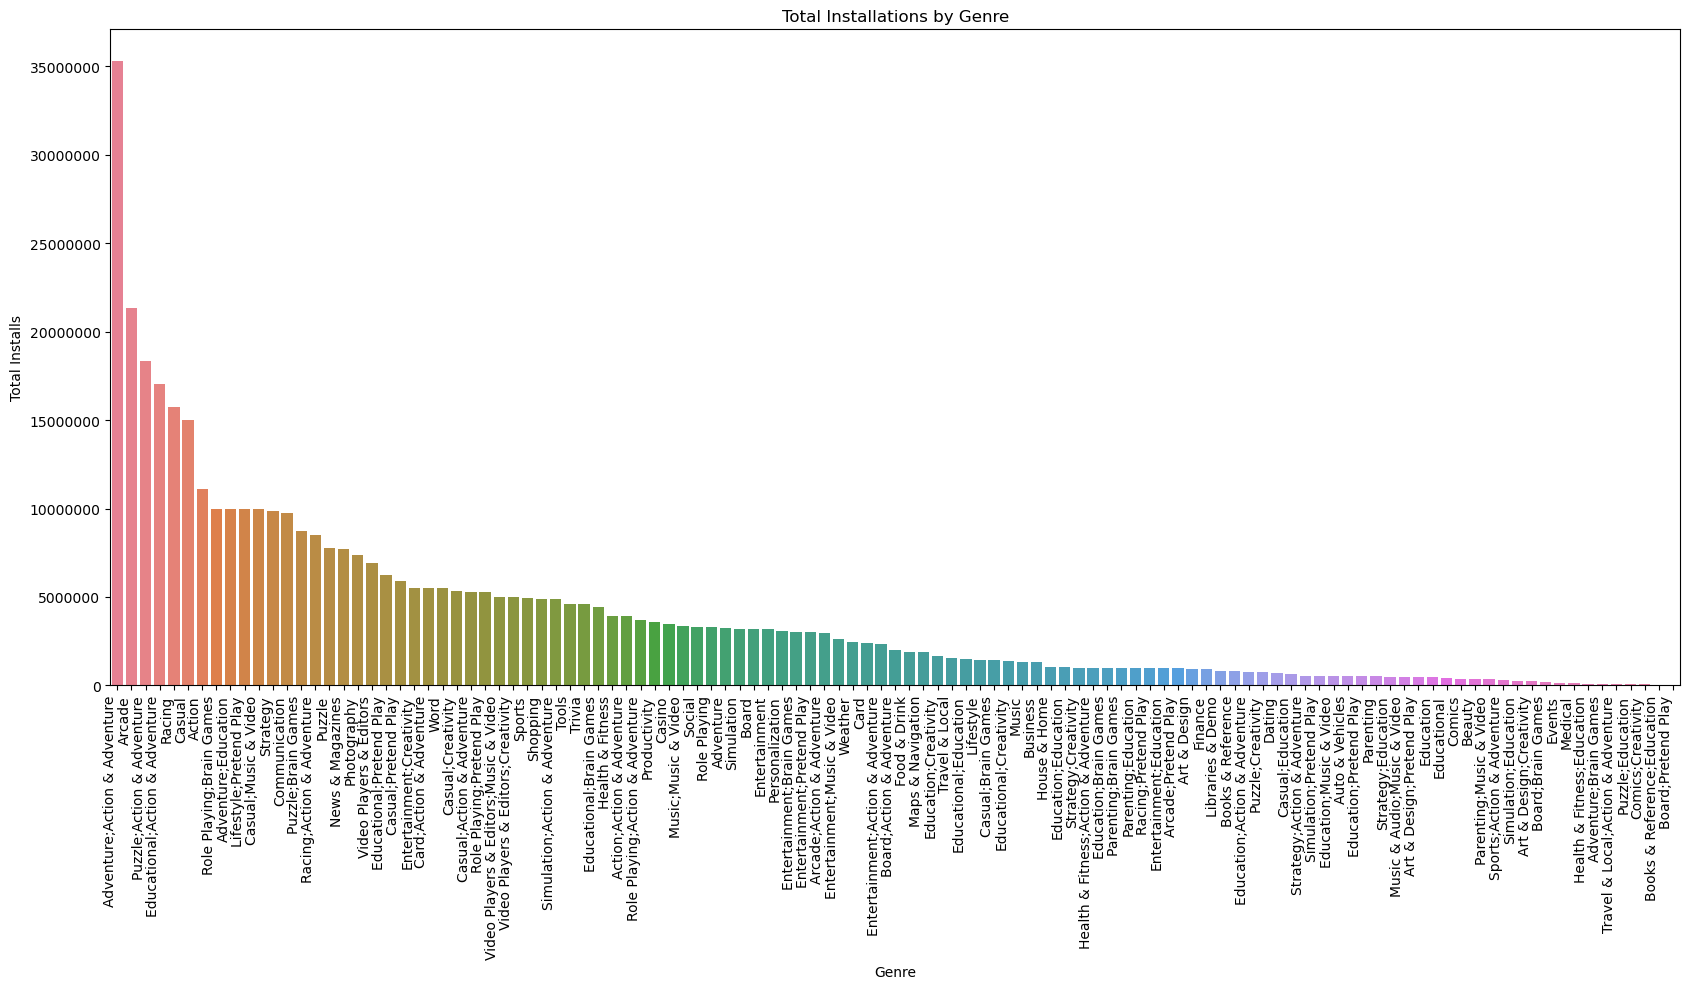

In [39]:
# Installations by Content Rating
genre_installs_avg = df.groupby('Genres')['Installs'].mean().sort_values(ascending=False)

# Plot Bar for the genre_installs
plt.figure(figsize=(17, 10))
sns.barplot(x= genre_installs_avg.index, y = genre_installs_avg.values, palette = 'husl')
plt.xlabel('Genre')
plt.ylabel('Total Installs')
plt.title('Total Installations by Genre')
plt.xticks(rotation=90, ha='right')  # Rotate labels to 90 degrees and align right

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### 6. Type

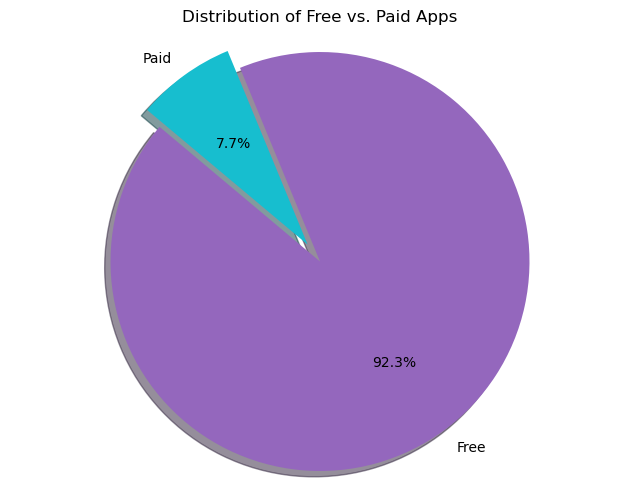

In [40]:
# Step 1: Distribution of Free vs. Paid Apps
free_apps_count = df[df['Type'] == 'Free'].shape[0]
paid_apps_count = df[df['Type'] == 'Paid'].shape[0]

# Define colors for free and paid apps
free_color = '#9467bd'  # dark blue
paid_color = '#17becf'  # dark green

# Visualize the distribution using a pie chart
labels = ['Free', 'Paid']
sizes = [free_apps_count, paid_apps_count]
colors = [free_color, paid_color]
explode = (0, 0.1)  # explode the 'Paid' slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Free vs. Paid Apps')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [41]:
# Summary statistics of ratings for free and paid apps
ratings_summary = df.groupby('Type')['Rating'].describe()
ratings_summary

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,6420.0,4.152523,0.559007,1.0,3.9,4.3,4.5,5.0
Paid,532.0,4.244173,0.572456,1.0,4.1,4.4,4.6,5.0


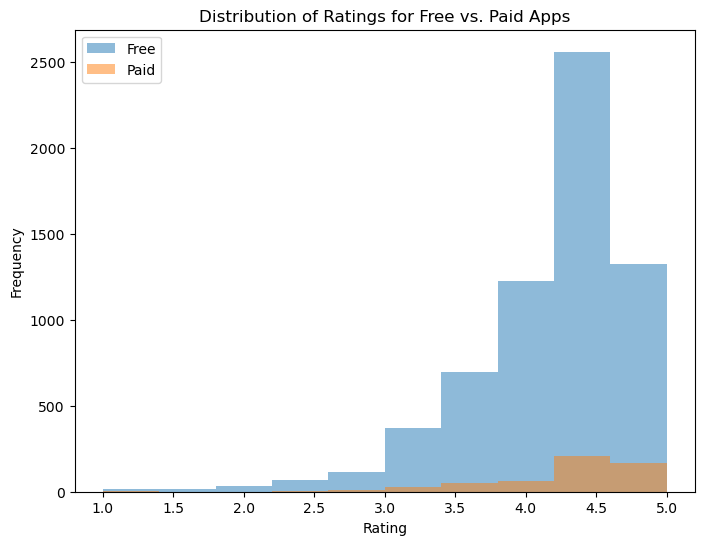

In [42]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
df[df['Type'] == 'Free']['Rating'].plot(kind='hist', alpha=0.5, label='Free')
df[df['Type'] == 'Paid']['Rating'].plot(kind='hist', alpha=0.5, label='Paid')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Free vs. Paid Apps')
plt.legend()
plt.show()

In [43]:
reviews_summary = df.groupby('Type')['Reviews'].describe()
reviews_summary

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,6420.0,155414.258411,1.068495e+06,1.0,97.00,1960.5,30032.25,44893888.0
Paid,532.0,6922.486842,2.967564e+04,1.0,24.75,165.0,1429.75,408292.0


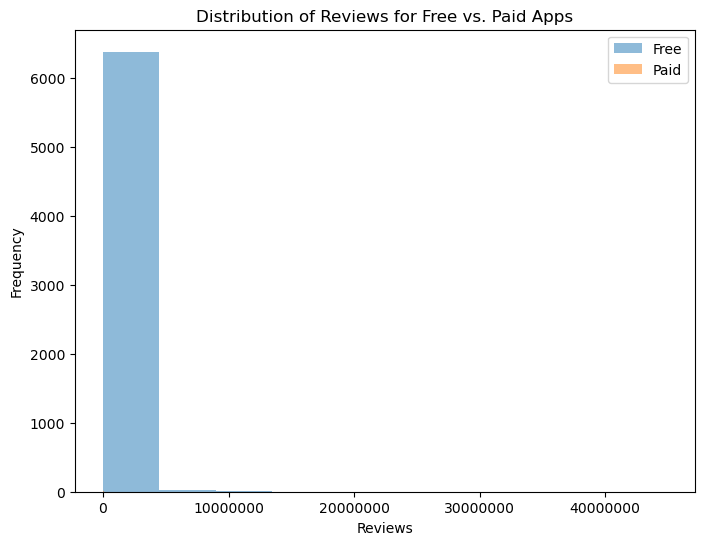

In [44]:
# Summary statistics of reviews for free and paid apps
reviews_summary = df.groupby('Type')['Reviews'].describe()

# Visualize the distribution of reviews
plt.figure(figsize=(8, 6))
df[df['Type'] == 'Free']['Reviews'].plot(kind='hist', alpha=0.5, label='Free')
df[df['Type'] == 'Paid']['Reviews'].plot(kind='hist', alpha=0.5, label='Paid')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews for Free vs. Paid Apps')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.legend()
plt.show()

### 7. Last Update

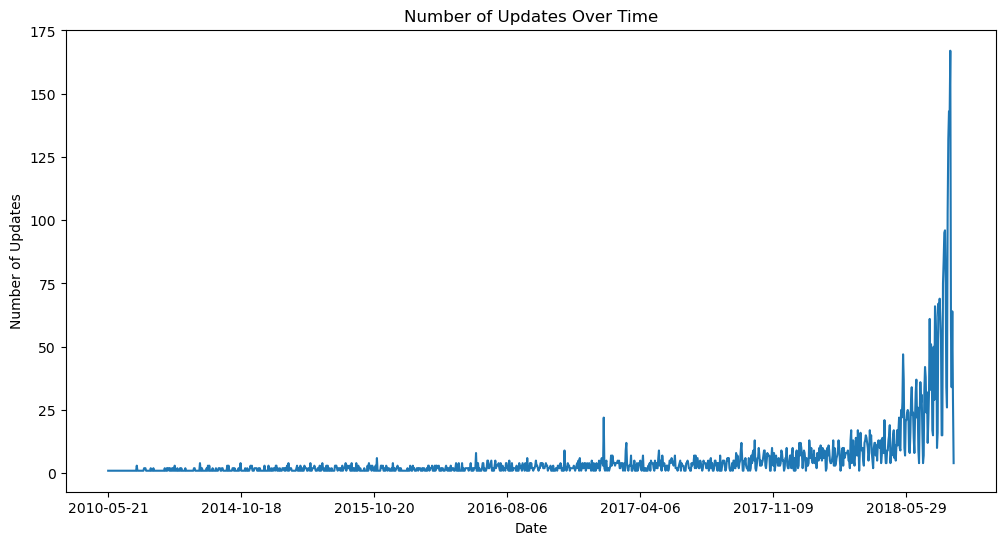

Most Recent Update: 2018-08-08


In [45]:
# Calculate most recent update
most_recent_update = df['Last Updated'].max()

# Time series plot
plt.figure(figsize=(12, 6))
df.groupby('Last Updated').size().plot()
plt.title('Number of Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Updates')
plt.show()

print("Most Recent Update:", most_recent_update)


## Correlation Matrix

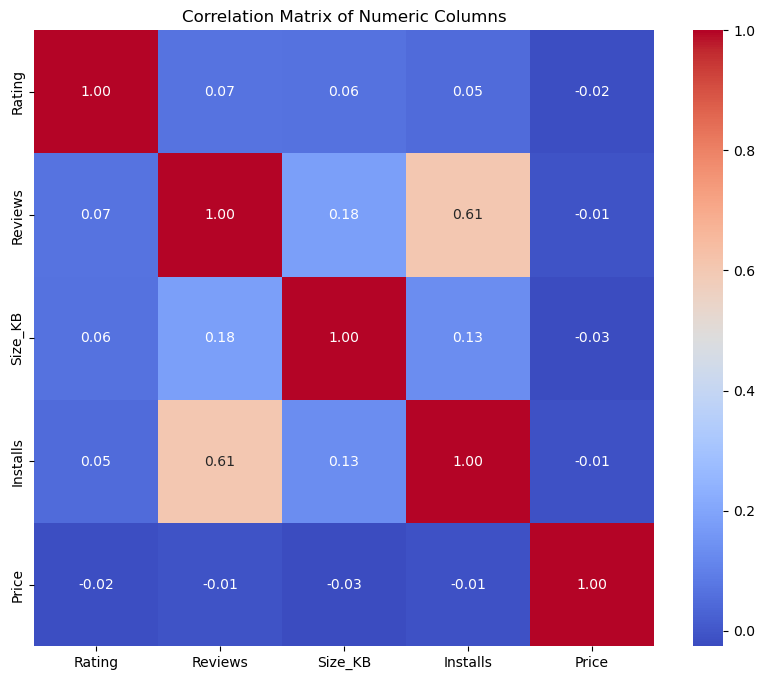

In [46]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

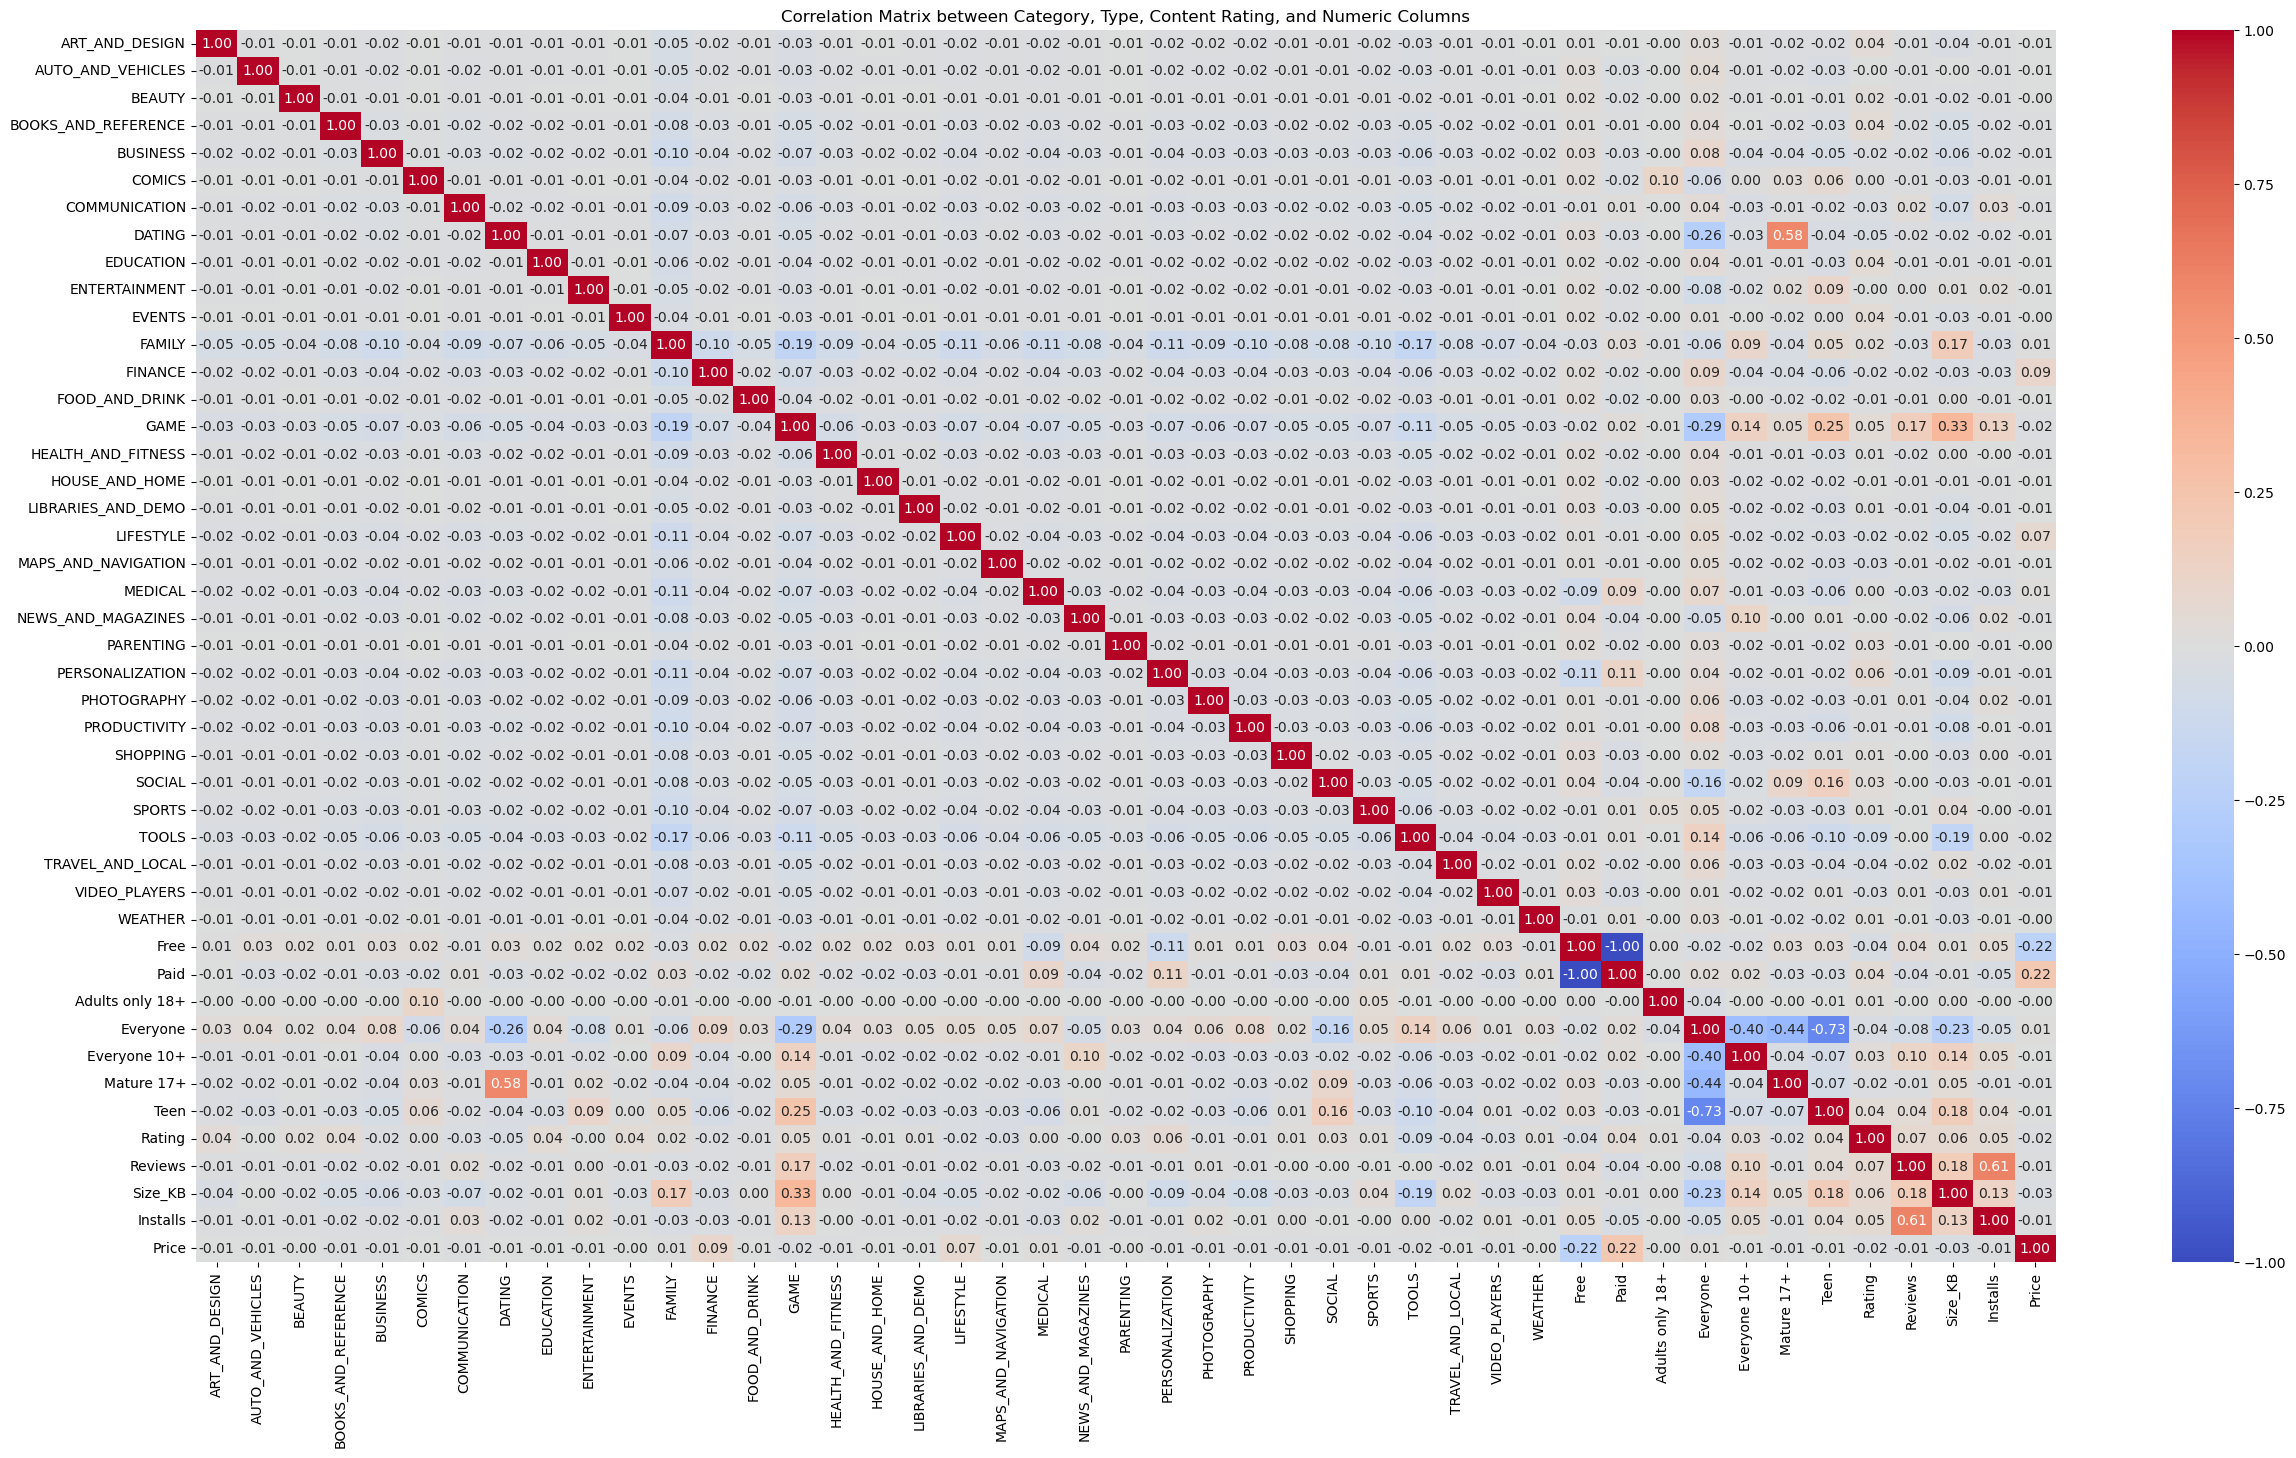

In [47]:
# Convert categorical columns to one-hot encoded form
category_dummies = pd.get_dummies(df['Category'])
type_dummies = pd.get_dummies(df['Type'])
content_rating_dummies = pd.get_dummies(df['Content Rating'])

# Concatenate one-hot encoded columns with numeric columns
df_concatenated = pd.concat([category_dummies, type_dummies, content_rating_dummies, numeric_df], axis=1)

# Calculate correlation matrix
correlation_matrix = df_concatenated.corr()

# Plot heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Category, Type, Content Rating, and Numeric Columns')
plt.show()

In [48]:
# Step 2: Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

category_dummies = pd.get_dummies(df['Category'])
type_dummies = pd.get_dummies(df['Type'])
content_rating_dummies = pd.get_dummies(df['Content Rating'])
genres_dummies = pd.get_dummies(df['Genres'])

# Concatenate one-hot encoded columns with numeric columns
df_concatenated = pd.concat([category_dummies, type_dummies, content_rating_dummies,genres_dummies, numeric_df], axis=1)


# Step 3: Calculate correlation coefficients
pearson_corr = df_concatenated.corr()['Price'].drop('Price')

# Step 4: Print the correlation coefficients
pearson_corr

ART_AND_DESIGN        -0.005226
AUTO_AND_VEHICLES     -0.006115
BEAUTY                -0.004715
BOOKS_AND_REFERENCE   -0.008109
BUSINESS              -0.009375
                         ...   
Word                  -0.003374
Rating                -0.021188
Reviews               -0.008913
Size_KB               -0.025567
Installs              -0.010506
Name: Price, Length: 155, dtype: float64

In [49]:
pearson_corr.reset_index().sort_values(by = 'Price', ascending = False).head(20)

,index,Price
34,Paid,0.223923
12,FINANCE,0.089488
96,Finance,0.089488
103,Lifestyle,0.067217
18,LIFESTYLE,0.067048
88,Entertainment,0.037107
36,Everyone,0.014590
20,MEDICAL,0.010657
106,Medical,0.010657
11,FAMILY,0.007415


In [50]:
pearson_corr.reset_index().sort_values(by = 'Price', ascending = False).tail(20)

,index,Price
15,HEALTH_AND_FITNESS,-0.009111
98,Health & Fitness,-0.009111
25,PRODUCTIVITY,-0.009306
117,Productivity,-0.009306
60,Business,-0.009375
4,BUSINESS,-0.009375
21,NEWS_AND_MAGAZINES,-0.009456
110,News & Magazines,-0.009456
40,Action,-0.009507
27,SOCIAL,-0.009564


In [51]:
from scipy import stats

data = []
for column in df_concatenated:
    pearson_coef, p_value = stats.pearsonr(df_concatenated[column], df_concatenated['Price'])
    data.append([column, pearson_coef, p_value ])

In [52]:
coeff_df = pd.DataFrame(data, columns = ['column','pearson_coef','p_value' ])
coeff_df

,column,pearson_coef,p_value
0,ART_AND_DESIGN,-0.005226,0.663062
1,AUTO_AND_VEHICLES,-0.006115,0.610229
2,BEAUTY,-0.004715,0.694267
3,BOOKS_AND_REFERENCE,-0.008109,0.499027
4,BUSINESS,-0.009375,0.434465
...,...,...,...
151,Rating,-0.021188,0.077304
152,Reviews,-0.008913,0.457463
153,Size_KB,-0.025567,0.033032
154,Installs,-0.010506,0.381118


In [54]:
coeff_df.sort_values(by = ['pearson_coef','p_value'], ascending = [False, False])

,column,pearson_coef,p_value
155,Price,1.000000,0.000000e+00
34,Paid,0.223923,9.873868e-80
12,FINANCE,0.089488,7.715954e-14
96,Finance,0.089488,7.715954e-14
103,Lifestyle,0.067217,2.025320e-08
...,...,...,...
142,Tools,-0.015169,2.060028e-01
14,GAME,-0.016760,1.623334e-01
151,Rating,-0.021188,7.730378e-02
153,Size_KB,-0.025567,3.303180e-02


    Finance' and 'Lifestyle' categories show the strongest correlation with price, as they have both large coefficients and very low p-values.